sh: 1: /home/emiliano/proyecto_INAOE/GATU/Proyecto/PROYECTO1.ipynb: Permission denied


Image dimensions: 1024x1024


ffmpeg version n4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix= --prefix=/usr --disable-debug --disable-doc --disable-static --enable-cuda --enable-cuda-sdk --enable-cuvid --enable-libdrm --enable-ffplay --enable-gnutls --enable-gpl --enable-libass --enable-libfdk-aac --enable-libfontconfig --enable-libfreetype --enable-libmp3lame --enable-libnpp --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopus --enable-libpulse --enable-sdl2 --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libv4l2 --enable-libvorbis --enable-libvpx --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxvid --enable-nonfree --enable-nvenc --enable-omx --enable-openal --enable-opencl --enable-runtime-cpudetect --enable-shared --enable-vaapi --enable-vdpau --enable-version3 --enable-xlib
  libavutil      56. 51.100 / 56. 51.100
  libavcodec     58. 91.100 / 58. 91.100
  libavformat    58. 45.100 

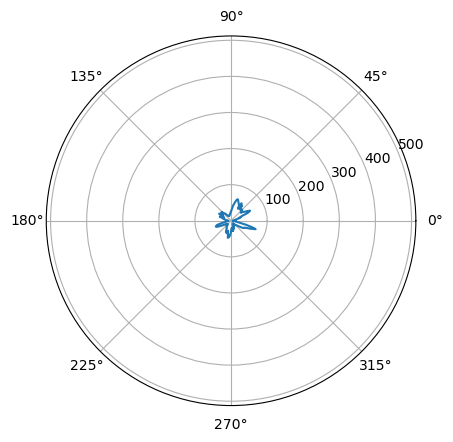

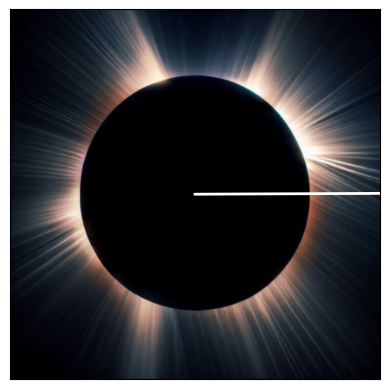

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os

# Load the input image
img = plt.imread('corona3.jpeg')

# Get the dimensions of the image
h, w, _ = img.shape

# Calculate center of image
center_x = w // 2
center_y = h // 2

# Initialize the radar values array with 3600 samples per angle
radar_values = np.zeros((h // 2, 360))

# Iterate over angles and radii
for angle in np.arange(0, 360, 1.0):
    for r in range(h // 2):
        x = int(np.round(center_x + r * np.sin(np.deg2rad(angle))))
        y = int(np.round(center_y + r * np.cos(np.deg2rad(angle))))
        if x < 0 or x >= w or y < 0 or y >= h:
            radar_values[r, int(angle*1)] = 0
        else:
            radar_values[r, int(angle*1)] = img[y, x, 0]

# Calculate average values at each angle
avg_values = np.mean(radar_values, axis=0)

# Plot the radar values
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(np.deg2rad(np.arange(0, 360, 1.0)), avg_values) #ax.plot(np.deg2rad(np.arange(360, 0, -1.0)), radar_values.T)

ax.set_ylim(0, h // 2)

# Save radar sweep to text file
data = np.column_stack((np.arange(0, 360, 1.0), avg_values))
# save the data as a CSV file
np.savetxt('lux.csv', data, delimiter=',', header='C1,C2', comments='', fmt='%.3f')

os.system('/home/emiliano/proyecto_INAOE/GATU/Proyecto/PROYECTO1.ipynb')

# create figure and axis objects
fig, ax = plt.subplots()

# show image
ax.imshow(img)

# set limits of x and y axis
ax.set_xlim([0, img.shape[1]])
ax.set_ylim([0, img.shape[0]])

# remove ticks and numbers
ax.set_xticks([])
ax.set_yticks([])

# display image dimensions
print(f"Image dimensions: {img.shape[1]}x{img.shape[0]}")

# calculate center of image
center_x = img.shape[1] / 2
center_y = img.shape[0] / 2
max_distance = np.sqrt((img.shape[0]/2)**2 + (img.shape[1]/2)**2)
#create line for radar sweeping

line, = ax.plot([center_x, center_x], [center_y, center_y-50], color='white', linewidth=2, solid_capstyle='round')
#define parameters for pulsation

freq = 10
amp = 5
#define function to update line position in animation

def update_line(num):
	angle = np.deg2rad(num)
	r = max_distance + amp*np.sin(2.0*np.pi*freq*num/num_frames)
	x = center_x + r*np.cos(angle)
	y = center_y - r*np.sin(angle)
	line.set_data([center_x, x], [center_y, y])
	alpha = 1#(1-r/100)**3 # calculate alpha value based on distance from center
	line.set_linewidth(2)# (2 + 4*(1-r/1000)) # set line thickness based on distance from center
	line.set_alpha(alpha) # set alpha value to create beam-like effect
	line.set_solid_capstyle('round')
	return line,

# create animation object
num_frames = 1440 # 72 seconds at 50ms per frame
ani = animation.FuncAnimation(fig, update_line, frames=np.linspace(0, 360, num_frames, endpoint=False), interval=50)

# create video writer
Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)

# save animation as video
ani.save('swept.mp4', writer=writer)

# add audio to the mp4 file
os.system('ffmpeg -i lux_ghostly.mp3 lux_ghostly.wav')
os.system('sox lux_ghostly.wav -n spectrogram -o sonogram.png')
os.system('geeqie sonogram.png')
os.system('ffmpeg -i lux_ghostly.mp3 -i swept.mp4 -map 0:a -map 1:v -c copy -shortest swept_with_audio.mp4')

plt.show()
